In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# # Use synapse and cell data to calculate displacement between the cell bodies of connected cells
# displacements = []
# self_connections = 0

# for i,synapse in enumerate(synapses[1000000:]):
#     pre_cell_id = synapse[0]
#     post_cell_id = synapse[1]

#     if i % 100000 == 0:
#         print(f'{i} synapses processed.')

#     if pre_cell_id == post_cell_id:
#         self_connections += 1
    
#     pre_cell_xyz = cells[cells['pt_root_id'] == pre_cell_id]['pt_position'].to_numpy()[0]
#     pre_cell_xyz = np.fromstring(pre_cell_xyz[1:-1], dtype=int, sep=' ')

#     post_cell_xyz = cells[cells['pt_root_id'] == post_cell_id]['pt_position'].to_numpy()[0]
#     post_cell_xyz = np.fromstring(post_cell_xyz[1:-1], dtype=int, sep=' ')

#     displacement = pre_cell_xyz - post_cell_xyz
#     displacements.append(displacement)

# print(self_connections)  # QUESTION: Count self connections?

# displacements = np.array(displacements)
# res_transform = np.diag([4 / 1000, 4 / 1000, 40 / 1000])  # 4x4x40 nm^3 to um^3

# displacements_df = pd.DataFrame(np.matmul(displacements, res_transform), columns=['x', 'y', 'z'])
# displacements_df.to_csv('data/displacements_1e6_2.csv')

In [2]:
cells = pd.read_csv('data/exc_cells.csv', index_col=[0])
synapses = pd.read_csv('data/all_synapses.csv', index_col=[0])
nonzero_disp = pd.read_csv('data/nonzero_displacements.csv', index_col=[0])

In [40]:
# nonzero_displacements = displacements[magnitudes > 0]
# self_synapses = synapses[synapses['pre_pt_root_id'] == synapses['post_pt_root_id']]

# print(nonzero_displacements.shape)
# print(self_synapses.shape)

# nonzero_displacements.to_csv('data/nonzero_displacements.csv')
# self_synapses.to_csv('data/self_synapses.csv')

(2544112, 3)
(288079, 4)


AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

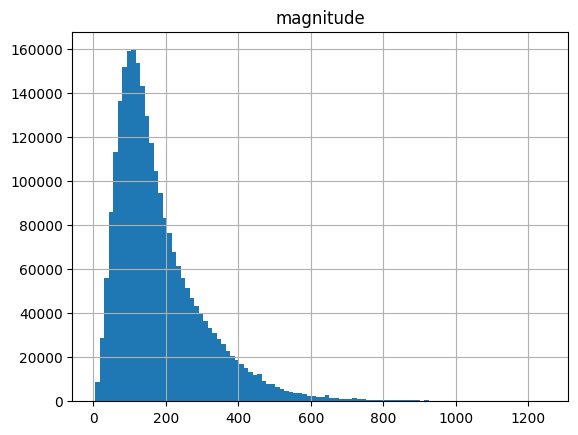

In [4]:
ax = magnitudes_df.hist(bins=100)
ax.set_xlabel('Displacement magnitude (um)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of displacement magnitudes')
ax.vlines(mag_stats['mean'], 0, 150000, color='red', label=f'Mean = {mag_stats["mean"]:.2f}')
ax.errorbar(mag_stats['mean'], 150000, xerr=mag_stats['std'], color='red', capsize=5, label='Std = {:.2f}'.format(mag_stats['std']))

ax.legend()
plt.show()

In [21]:
# Do eigenanalysis on displacements dataframe
covariance_matrix = displacements.cov()
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print(eigenvalues)
print(eigenvectors)

[24705.07920586 12556.23671274  6478.56700239]
[[ 0.24806908  0.96846805  0.02305156]
 [ 0.96397879 -0.2444225  -0.10489298]
 [ 0.09595118 -0.04824192  0.99421632]]


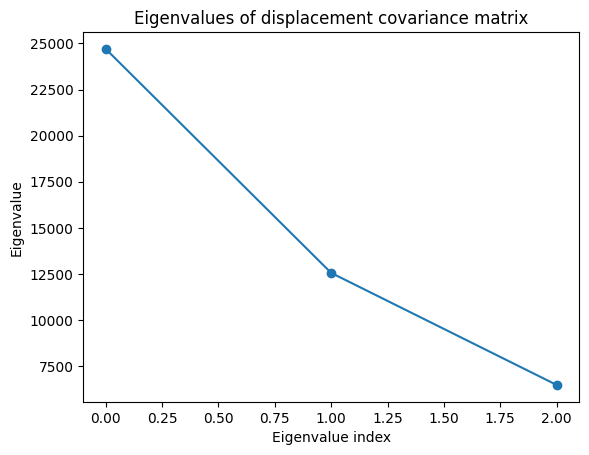

In [14]:
# Plot eigenvalues
ax = plt.gca()
ax.plot(eigenvalues, marker='o')
ax.set_xlabel('Eigenvalue index')
ax.set_ylabel('Eigenvalue')
ax.set_title('Eigenvalues of displacement covariance matrix')
plt.show()

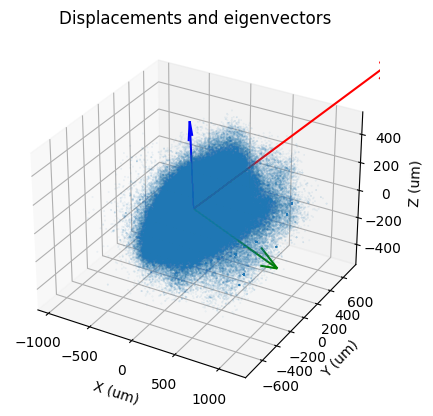

In [17]:
# Plot the eigenvectors in 3D on the same plot as the displacements
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(displacements['x'], displacements['y'], displacements['z'], alpha=0.1, s=0.1, label='Displacements')
ax.quiver(0, 0, 0, eigenvectors[0, 0], eigenvectors[1, 0], eigenvectors[2, 0], color='red',
           label='Eigenvector 1', length=eigenvalues[0] / 10, arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, eigenvectors[0, 1], eigenvectors[1, 1], eigenvectors[2, 1], color='green',
          label='Eigenvector 2', length=eigenvalues[1] / 10, arrow_length_ratio=0.2)
ax.quiver(0, 0, 0, eigenvectors[0, 2], eigenvectors[1, 2], eigenvectors[2, 2], color='blue',
          label='Eigenvector 3', length=eigenvalues[2] / 10, arrow_length_ratio=0.2)

ax.xaxis.label.set_text('X (um)')
ax.yaxis.label.set_text('Y (um)')
ax.zaxis.label.set_text('Z (um)')
ax.set_title('Displacements and eigenvectors')
plt.show()

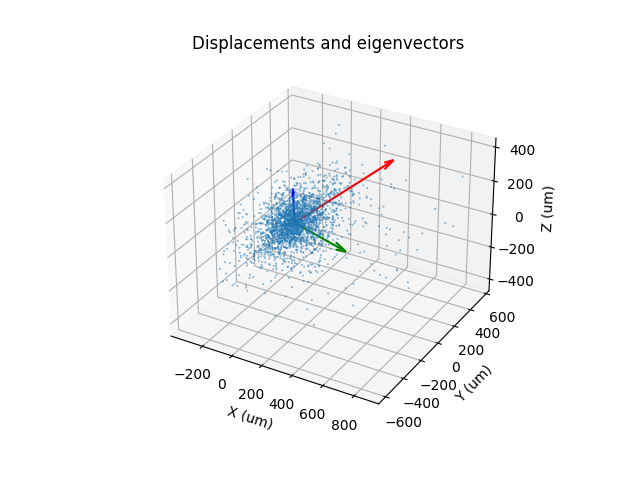

In [20]:
%matplotlib widget
# Plot the displacements in 3D with the eigenvectors as the axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(displacements['x'][::1000], displacements['y'][::1000], displacements['z'][::1000], alpha=0.8, s=0.1, label='Displacements')
ax.quiver(0, 0, 0, eigenvectors[0, 0], eigenvectors[1, 0], eigenvectors[2, 0], color='red',
           label='Eigenvector 1', length=eigenvalues[0] / 30, arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, eigenvectors[0, 1], eigenvectors[1, 1], eigenvectors[2, 1], color='green',
          label='Eigenvector 2', length=eigenvalues[1] / 30, arrow_length_ratio=0.2)
ax.quiver(0, 0, 0, eigenvectors[0, 2], eigenvectors[1, 2], eigenvectors[2, 2], color='blue',
          label='Eigenvector 3', length=eigenvalues[2] / 30, arrow_length_ratio=0.2)

ax.xaxis.label.set_text('X (um)')
ax.yaxis.label.set_text('Y (um)')
ax.zaxis.label.set_text('Z (um)')
ax.set_title('Displacements and eigenvectors')
plt.show()

18.33499618331429


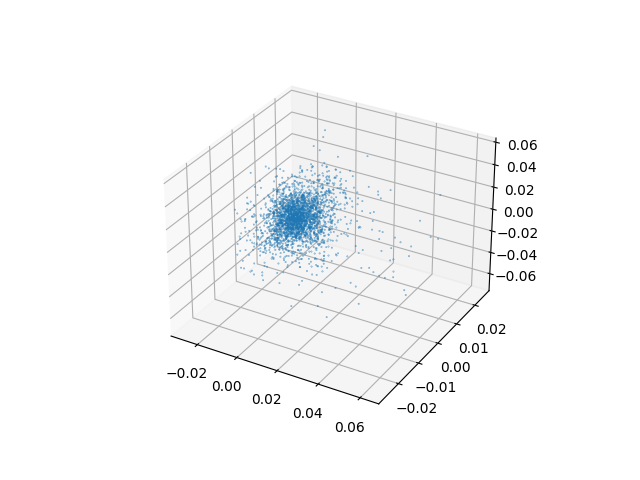

In [31]:
inv_cov = np.linalg.inv(covariance_matrix)
iso_displacements = displacements.copy().to_numpy()
print(np.linalg.norm(iso_displacements.mean(axis=0)))
iso_displacements -= iso_displacements.mean(axis=0)
iso_displacements = np.matmul(iso_displacements, inv_cov)
iso_displacements = pd.DataFrame(iso_displacements, columns=['x', 'y', 'z'])
iso_displacements.to_csv('data/iso_displacements.csv')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(iso_displacements['x'][::1000], iso_displacements['y'][::1000], iso_displacements['z'][::1000], alpha=0.8, s=0.1, label='Displacements')
plt.show()

(array([4.01600e+03, 3.11235e+05, 5.16240e+04, 8.19630e+04, 1.09582e+05,
        1.30837e+05, 1.44835e+05, 1.52110e+05, 1.54705e+05, 1.53956e+05,
        1.49136e+05, 1.42346e+05, 1.32556e+05, 1.24696e+05, 1.14203e+05,
        1.03800e+05, 9.35320e+04, 8.34710e+04, 7.29290e+04, 6.38660e+04,
        5.53920e+04, 4.77500e+04, 4.15580e+04, 3.60110e+04, 3.04780e+04,
        2.73090e+04, 2.30150e+04, 2.00050e+04, 1.74360e+04, 1.52720e+04,
        1.34960e+04, 1.17820e+04, 1.05220e+04, 9.30700e+03, 8.59900e+03,
        7.53000e+03, 7.54600e+03, 6.20500e+03, 5.71700e+03, 5.16300e+03,
        4.59400e+03, 4.13300e+03, 3.65400e+03, 3.30700e+03, 2.97100e+03,
        2.65300e+03, 2.40600e+03, 3.81700e+03, 1.98500e+03, 2.13600e+03,
        1.79200e+03, 1.80500e+03, 1.58300e+03, 1.36200e+03, 2.43600e+03,
        1.55700e+03, 1.25000e+03, 1.19500e+03, 1.07600e+03, 1.05300e+03,
        9.46000e+02, 1.01300e+03, 9.15000e+02, 8.67000e+02, 7.34000e+02,
        6.78000e+02, 5.71000e+02, 1.19200e+03, 5.27

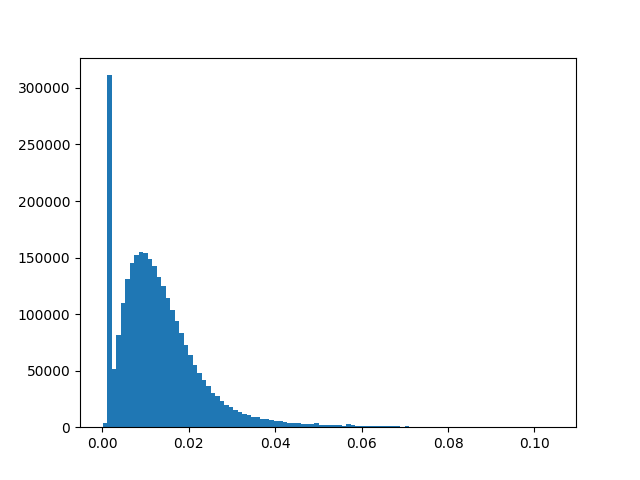

In [34]:
plt.figure()

iso_disp_df = pd.read_csv('data/iso_displacements.csv', index_col=[0]).to_numpy()
mags = np.linalg.norm(iso_disp_df, axis=1)

plt.hist(mags, bins=100)

0.014682355223630579 0.013196714983682151


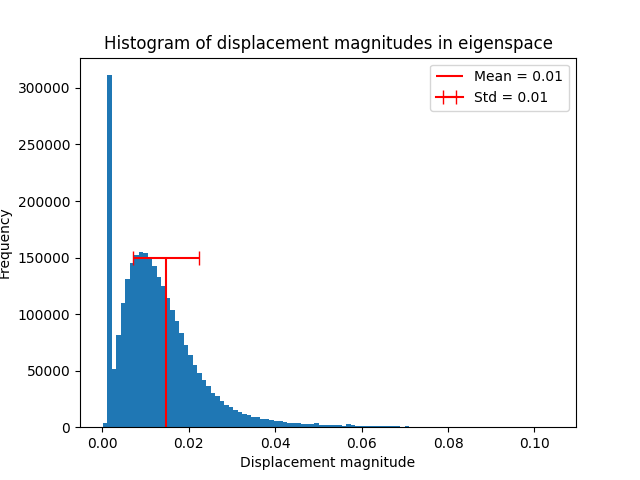

In [39]:
sig_squared = (1/(2*len(mags[mags>0]))) * np.sum(mags[mags>0]**2)
mean_monte_carlo = np.mean(mags[mags>0])
mean = np.sqrt(sig_squared) * np.sqrt(np.pi/2)
std = np.sqrt(sig_squared) * np.sqrt(4 - np.pi) / np.sqrt(2)

print(mean, mean_monte_carlo)

samples = np.linspace(0, 0.1, 100)

ax = plt.subplots()[1]

ax.hist(mags[mags>0], bins=100)
ax.set_xlabel('Displacement magnitude')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of displacement magnitudes in eigenspace')
ax.vlines(mean, 0, 150000, color='red', label=f'Mean = {mean:.2f}')
ax.errorbar(mean, 150000, xerr=std, color='red', capsize=5, label='Std = {:.2f}'.format(std))

ax.legend()
plt.show()


